In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.DataFrame(pd.read_pickle("../liquidity_provider_data/usdc_wpls.pkl"))

In [2]:
data.head()

,contract_address,event_name,topics,data,block_number,transaction_hash,transaction_index,block_hash,log_index,transaction_from_address,transaction_to_address,transaction_gas,transaction_gas_price
0,0x6753560538ECa67617A9Ce605178F788bE7E524E,Transfer,[0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x00000000000000000000000000000000000000000000...,17274738,0xc95b19ed177ead2e029be9e367be992e5108e15f2567...,8,0x22c1e1df9f25fda6ed14a2a125e0295465714afaf5da...,78,0x2f49e77B53361488df10e9c196C9aE24B5b9C7ca,0x98bf93ebf5c380C0e6Ae8e192A7e2AE08edAcc02,6693960,4609835352353048
1,0x6753560538ECa67617A9Ce605178F788bE7E524E,Transfer,[0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x00000000000000000000000000000000000000000000...,17274738,0xc95b19ed177ead2e029be9e367be992e5108e15f2567...,8,0x22c1e1df9f25fda6ed14a2a125e0295465714afaf5da...,79,0x2f49e77B53361488df10e9c196C9aE24B5b9C7ca,0x98bf93ebf5c380C0e6Ae8e192A7e2AE08edAcc02,6693960,4609835352353048
2,0x6753560538ECa67617A9Ce605178F788bE7E524E,Sync,[0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78...,0x00000000000000000000000000000000000000000000...,17274738,0xc95b19ed177ead2e029be9e367be992e5108e15f2567...,8,0x22c1e1df9f25fda6ed14a2a125e0295465714afaf5da...,80,0x2f49e77B53361488df10e9c196C9aE24B5b9C7ca,0x98bf93ebf5c380C0e6Ae8e192A7e2AE08edAcc02,6693960,4609835352353048
3,0x6753560538ECa67617A9Ce605178F788bE7E524E,Mint,[0xdbba30eb0402b389513e87f51f4db2db80bed454384...,0x00000000000000000000000000000000000000000000...,17274738,0xc95b19ed177ead2e029be9e367be992e5108e15f2567...,8,0x22c1e1df9f25fda6ed14a2a125e0295465714afaf5da...,81,0x2f49e77B53361488df10e9c196C9aE24B5b9C7ca,0x98bf93ebf5c380C0e6Ae8e192A7e2AE08edAcc02,6693960,4609835352353048
4,0x6753560538ECa67617A9Ce605178F788bE7E524E,Sync,[0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78...,0x00000000000000000000000000000000000000000000...,17274740,0x73d0f319df01e08c4b7a9f876e349701bd013e339e05...,61,0x0514c6a10d5ea44f10e03632be4f82c8318c97131bfd...,259,0x08904C3Ba8E6d0405899f2Bd32C29cd0b73D71dC,0x98bf93ebf5c380C0e6Ae8e192A7e2AE08edAcc02,450320,4225297991036289


<Axes: ylabel='event_name'>

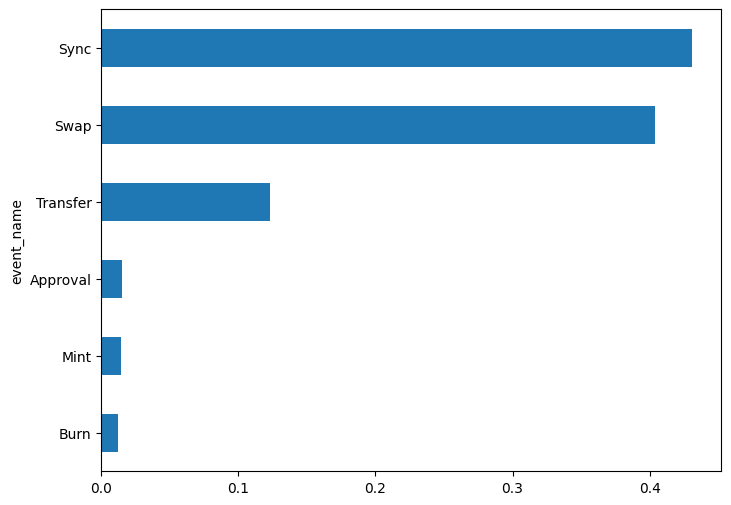

In [3]:
data.value_counts("event_name", normalize=True).sort_values().plot(kind='barh', figsize=(8, 6))

<Axes: xlabel='block_number'>

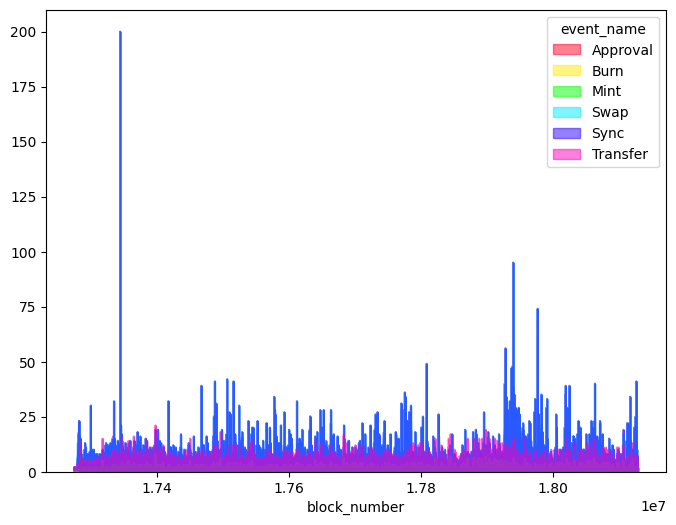

In [4]:
areaplot = data.groupby(['block_number','event_name']).transaction_hash.count().reset_index().pivot(index='block_number', columns='event_name', values='transaction_hash').fillna(0)
areaplot.plot.area(stacked=False, colormap="gist_rainbow",  figsize=(8, 6))

In [5]:
areaplot


event_name,Approval,Burn,Mint,Swap,Sync,Transfer
block_number,,,,,,
17274738,0.0,0.0,1.0,0.0,1.0,2.0
17274740,0.0,0.0,0.0,1.0,1.0,0.0
17274766,0.0,0.0,0.0,1.0,1.0,0.0
17274778,0.0,0.0,1.0,0.0,1.0,2.0
17274784,1.0,1.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...
18128541,0.0,0.0,0.0,2.0,2.0,0.0
18128554,0.0,0.0,0.0,1.0,1.0,0.0
18128555,0.0,0.0,0.0,2.0,2.0,0.0
